# Polynomial Regression

## Introduction

In the last lesson, you saw how you can account for interactions between two variables by including interaction effects in your model. In this lesson, you'll learn about another way to extend your regression model by including polynomial terms.

## Objectives

You will be able to:

- Define polynomial variables in a regression context  
- Use sklearn's built-in capabilities to create polynomial features 

## An example with one predictor

The dataset `'yields.csv'`, with just 21 cases, contains measurements of the yields from an experiment done at six different levels of temperature in degrees Fahrenheit. Let's plot them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
yld = pd.read_csv('yield.csv', sep='\s+', index_col=0)
yld.head()

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


We will now seperate the DataFrame into the predictor and outcome variables, `X` and `y`. We do so by:   
- Assigning the `'Yield'` column to `y` 
- Dropping the `'Yield'` column from the `yld` DataFrame to create `X` 

_Note: All scikit-learn classes assume the data to be in a certain shape, and by preparing data in this way, we ensure that these requirements are always met._

In [2]:
y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)

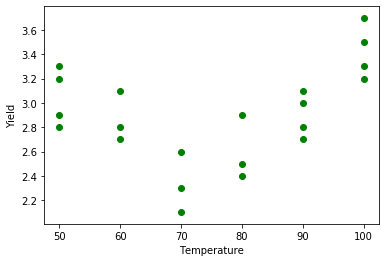

In [3]:
plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

It's clear that there is no linear relationship between Yield and Temperature. Let's try and plot a line anyways and see how the model performs:

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

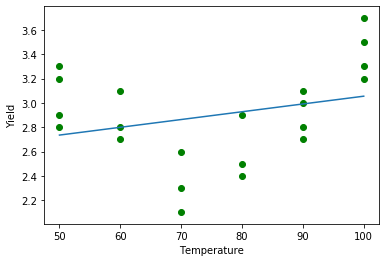

In [5]:
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, reg.predict(X))

r2_score(y, reg.predict(X))

0.08605718085106362

## A quadratic relationship

When relationships between predictors and outcome are not linear and show some sort of curvature, polynomials can be used to generate better approximations. The idea is that you can transform your input variable by e.g, squaring it. The corresponding model would then be:


$\hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

The idea is simple. You can square your predictor (here, "Temp") and include it in your model as if it were a new predictor.

In [7]:
X['Temp_sq'] = X['Temp']**2
X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


In [8]:
reg_q = LinearRegression().fit(X, y)

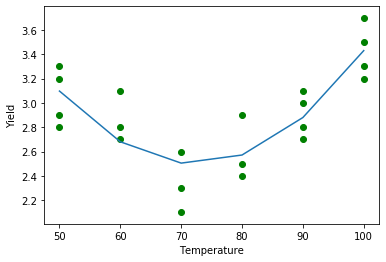

In [9]:
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

This is the resulting plot. Note that the fit is much better, and this is confirmed by the $R^2$score: where it was 0.086 before, it now is 0.6948!

In [10]:
mean_squared_error(y, reg_q.predict(X))

0.04650413890879158

In [11]:
r2_score(y, reg_q.predict(X))

0.6948165884110553

Note that you get a seemingly "piecewise linear" function here,  because the yields were only measured at 50, 60, 70, 80, 90 and 100. In reality, this model generates a smooth curve, as denoted below.

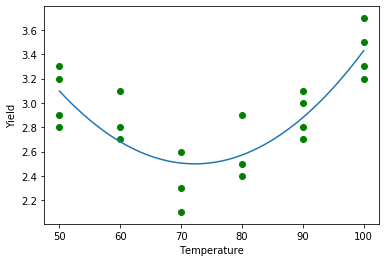

In [12]:
import numpy as np
plt.scatter(X['Temp'], y, color='green')

X_pred = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])
X_pred['Temp_sq'] = X_pred**2 
y_pred = reg_q.predict(X_pred)

plt.plot(X_pred['Temp'], y_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

## Higher-order relationships

The use of polynomials is not restricted to quadratic relationships. You can explore cubic or higher order relationships as well! Imagine you want to go until the power of 10, it would be quite annoying to transform your variable 9 times. Of course, Scikit-Learn has a built-in polynomial option in the `preprocessing` module! Let's call it with a polynomial of 6!

In [13]:
from sklearn.preprocessing import PolynomialFeatures

y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)

poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X)

Take a look at what these transformed features really look like. As you can see, Scikit-Learn transformed the X value of a single 50 into $50^1$ through $50^6$ ! The first value of 1 represents the intercept in the linear regression, which you can read more about in the [PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [14]:
print('The transformed feature names are: {}'.format(poly.get_feature_names()))
print('------------------')
print('The first row of transformed data is: {}'.format(X_fin[0]))

The transformed feature names are: ['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
------------------
The first row of transformed data is: [1.0000e+00 5.0000e+01 2.5000e+03 1.2500e+05 6.2500e+06 3.1250e+08
 1.5625e+10]


Now you can fit a linear regression model with your transformed data.

In [15]:
reg_poly = LinearRegression().fit(X_fin, y)

In [16]:
X_linspace = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])

X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

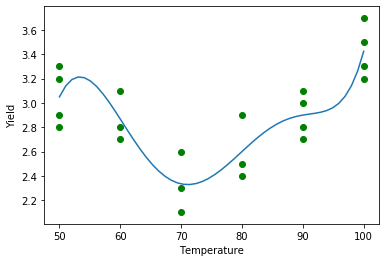

In [17]:
plt.scatter(X['Temp'], y, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [18]:
mean_squared_error(y, reg_poly.predict(X_fin))

0.03670634920635693

In [19]:
r2_score(y, reg_poly.predict(X_fin))

0.7591145833332826

This seems to be a pretty smooth fit! This good fit is also confirmed with an even better $R^2$. Do note that by adding polynomials, you make your model more complex. Instead of just having 2 parameters ($\beta_0$ and $\beta_1$) for a linear model, you now have 7 (one for the intercept, and 6 for the terms when going until a polynomial with degree 6). More on that later!

## Summary

Great! You now know how to include polynomials in your linear models. Let's go ahead and practice this knowledge!